CHẠY MODEL TRÊN DỮ LIỆU ĐÃ XỬ LÝ (PROCESSED DATA)

--- KẾT QUẢ (RAW DATA) ---
              precision    recall  f1-score   support

           0       0.99      0.68      0.80       970
           1       0.12      0.84      0.21        50

    accuracy                           0.69      1020
   macro avg       0.55      0.76      0.51      1020
weighted avg       0.95      0.69      0.77      1020


Ma trận nhầm lẫn:
[[657 313]
 [  8  42]]


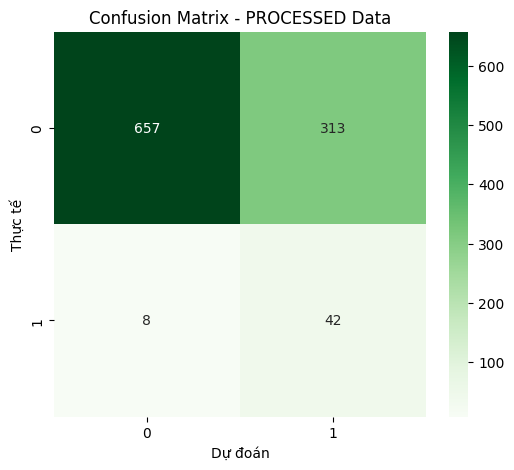

In [25]:
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

current_dir = Path.cwd()
data_dir = current_dir.parent.parent / "data"

print("="*50)
print("CHẠY MODEL TRÊN DỮ LIỆU ĐÃ XỬ LÝ (PROCESSED DATA)")
print("="*50)

# Thiết lập đường dẫn (sửa lại nếu cần thiết theo máy của bạn)
# Giả sử bạn đang chạy code ở thư mục gốc chứa thư mục data
processed_dir = data_dir / "processed"

# 1. Load dữ liệu đã chuẩn bị sẵn
# Train trên tập đã cân bằng (Balanced)
train_df = pd.read_csv(processed_dir / 'train_balanced.csv')
# Test trên tập test riêng biệt (đã scaled nhưng giữ nguyên tỷ lệ thực tế)
test_df = pd.read_csv(processed_dir / 'test.csv')

# 2. Tách Features và Target
X_train = train_df.drop(columns=['stroke'])
y_train = train_df['stroke']

X_test = test_df.drop(columns=['stroke'])
y_test = test_df['stroke']

# 3. Train Model
# Dữ liệu đã ngon, chỉ cần gọi model cơ bản
model = LogisticRegression(max_iter=1000)

# Bắt đầu đo thời gian
start = time.time()

model.fit(X_train, y_train)

# 5. Đánh giá
y_pred = model.predict(X_test)

end = time.time()
elapsed_time = end - start

print("\n--- KẾT QUẢ (RAW DATA) ---")
print(classification_report(y_test, y_pred))

# Tính accuracy
acc = accuracy_score(y_test, y_pred)

print("\nMa trận nhầm lẫn:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Vẽ Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - PROCESSED Data')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.show()

# NHẬN XÉT DỰ KIẾN:
# Accuracy có thể giảm xuống còn khoảng 70-80%.
# NHƯNG: Recall của class 1 (Stroke) sẽ tăng vọt (ví dụ từ 0% lên 80%).
# Điều này có nghĩa là model đã thực sự học được cách phát hiện người bệnh.

In [ ]:
output_dir = data_dir / "results"
output_dir.mkdir(exist_ok=True)

report = classification_report(y_test, y_pred, output_dict=True)

df_report = pd.DataFrame(report)

# Thêm accuracy (global) vào dòng riêng
df_report.loc["accuracy"] = [acc, None, None, None, None]

# Thêm thời gian chạy
df_report.loc["time_seconds"] = [elapsed_time, None, None, None, None]

# đặt tên riêng
df_report.to_csv(output_dir / "logistic_regression_processed_metrics.csv")